In [ ]:
# https://github.com/facebookresearch/segment-anything/blob/main/notebooks/automatic_mask_generator_example.ipynb

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [2]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [3]:
image = cv2.imread(r'Train_Test_Folder\train\ML-AR-Classic\4f17346692861d474bed0a2ef8710926.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

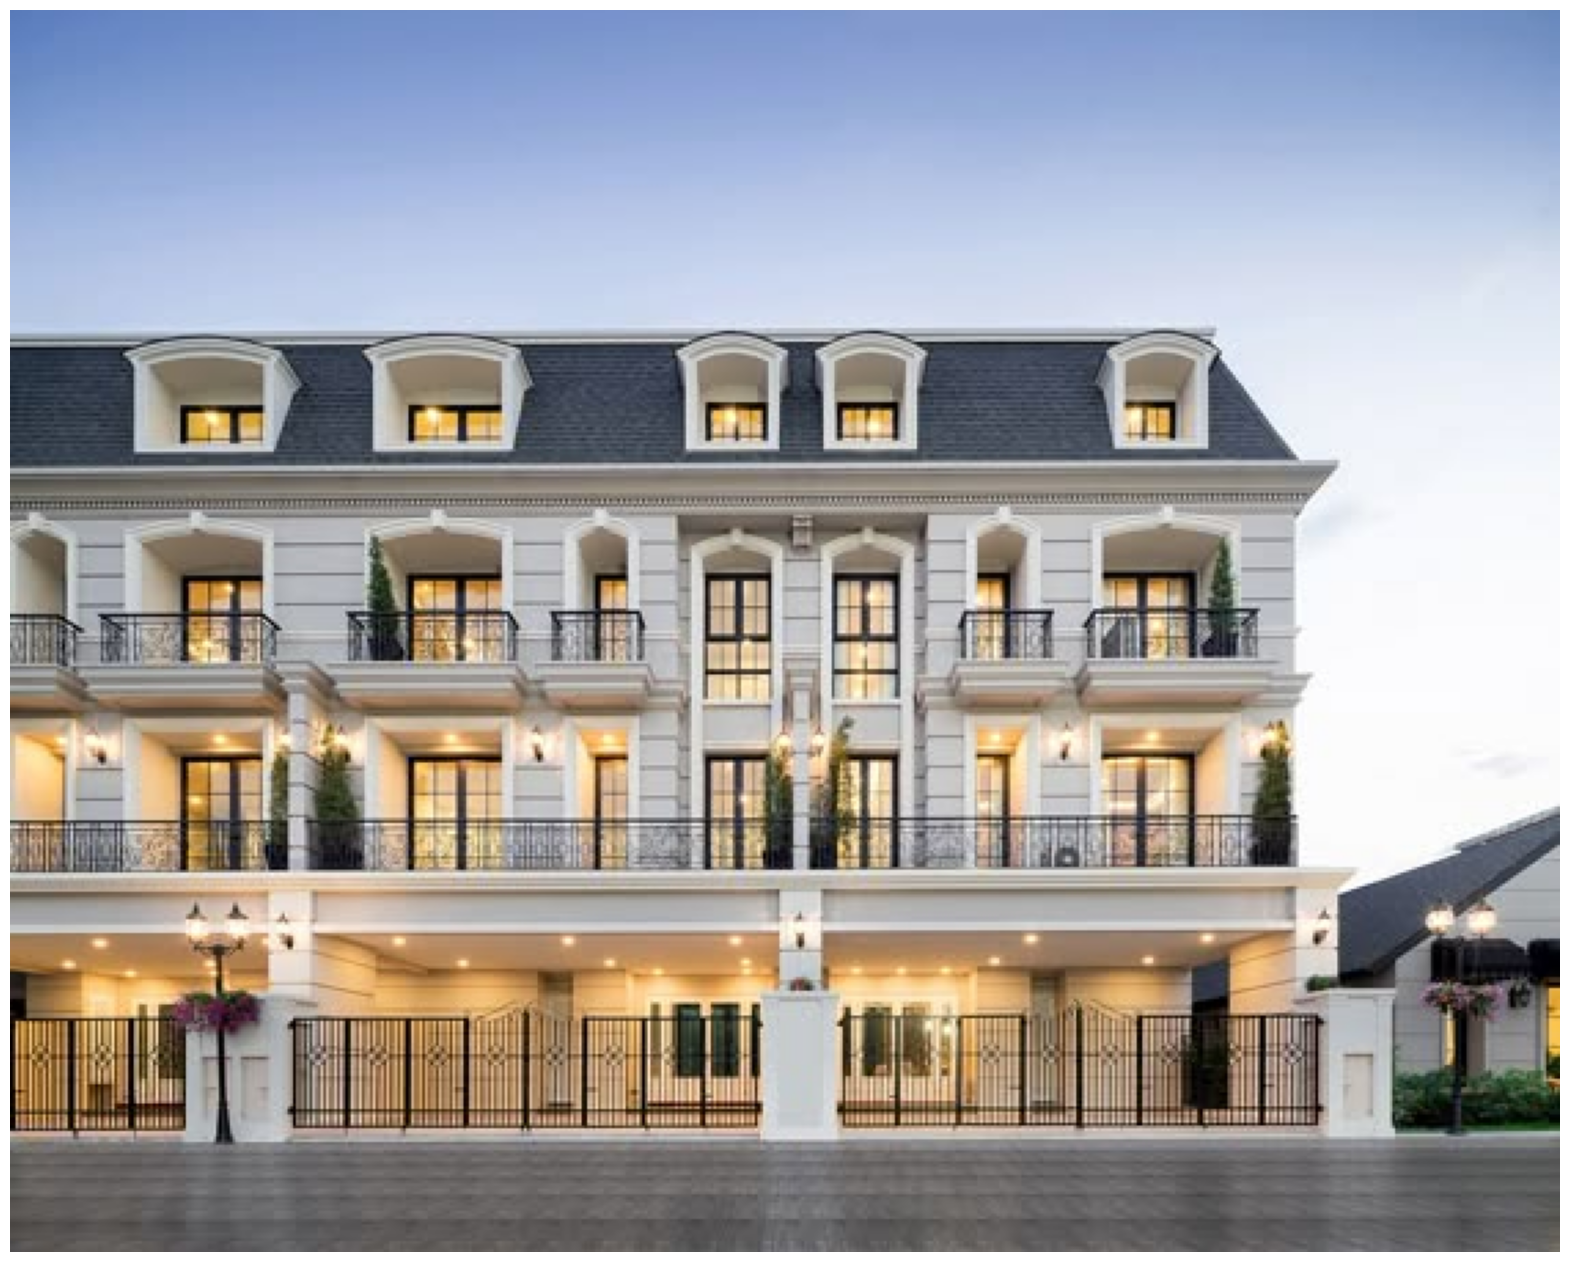

In [4]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

In [5]:
import torch
print("CUDA Available:", torch.cuda.is_available())


CUDA Available: True


In [6]:
import torch
print(torch.__version__)
print(torch.version.cuda)


2.5.1+cu118
11.8


In [24]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cpu" # "cuda" or "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [25]:
masks = mask_generator.generate(image)

In [26]:
print(len(masks))
print(masks[0].keys())

131
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


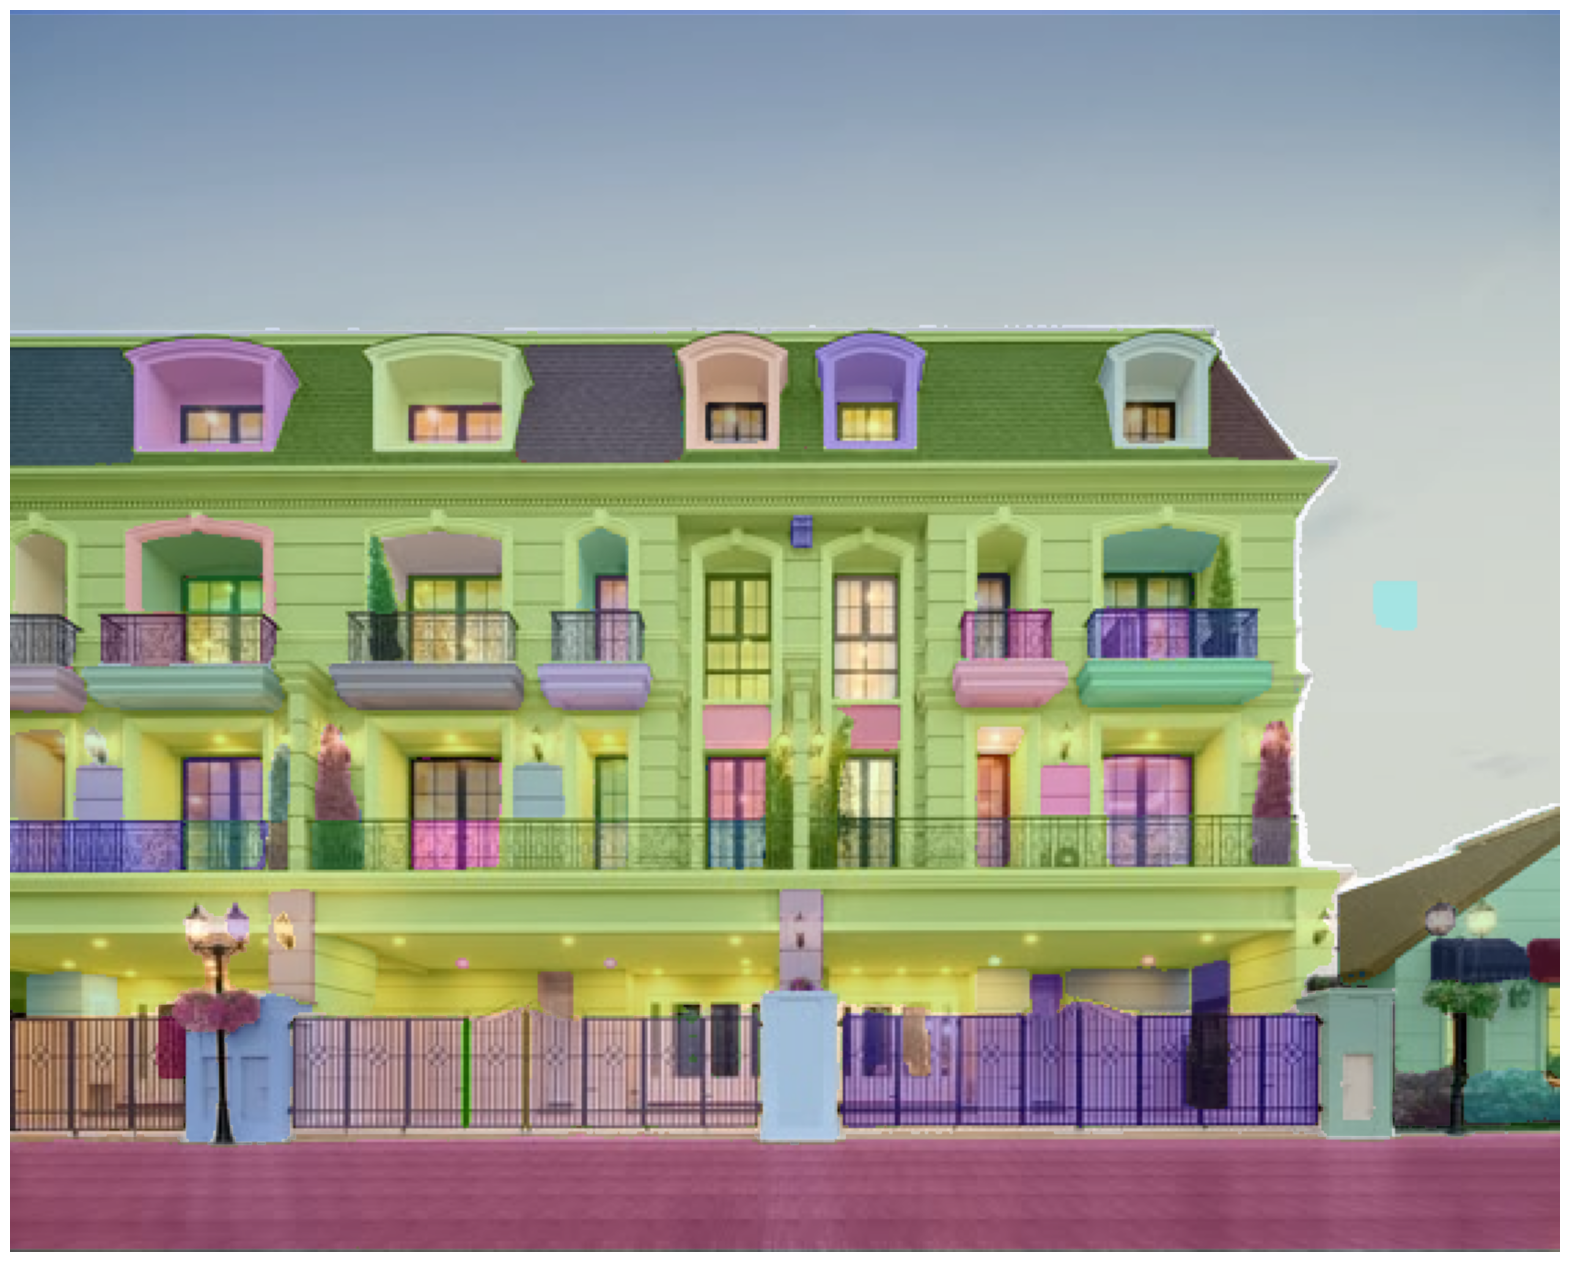

In [27]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 

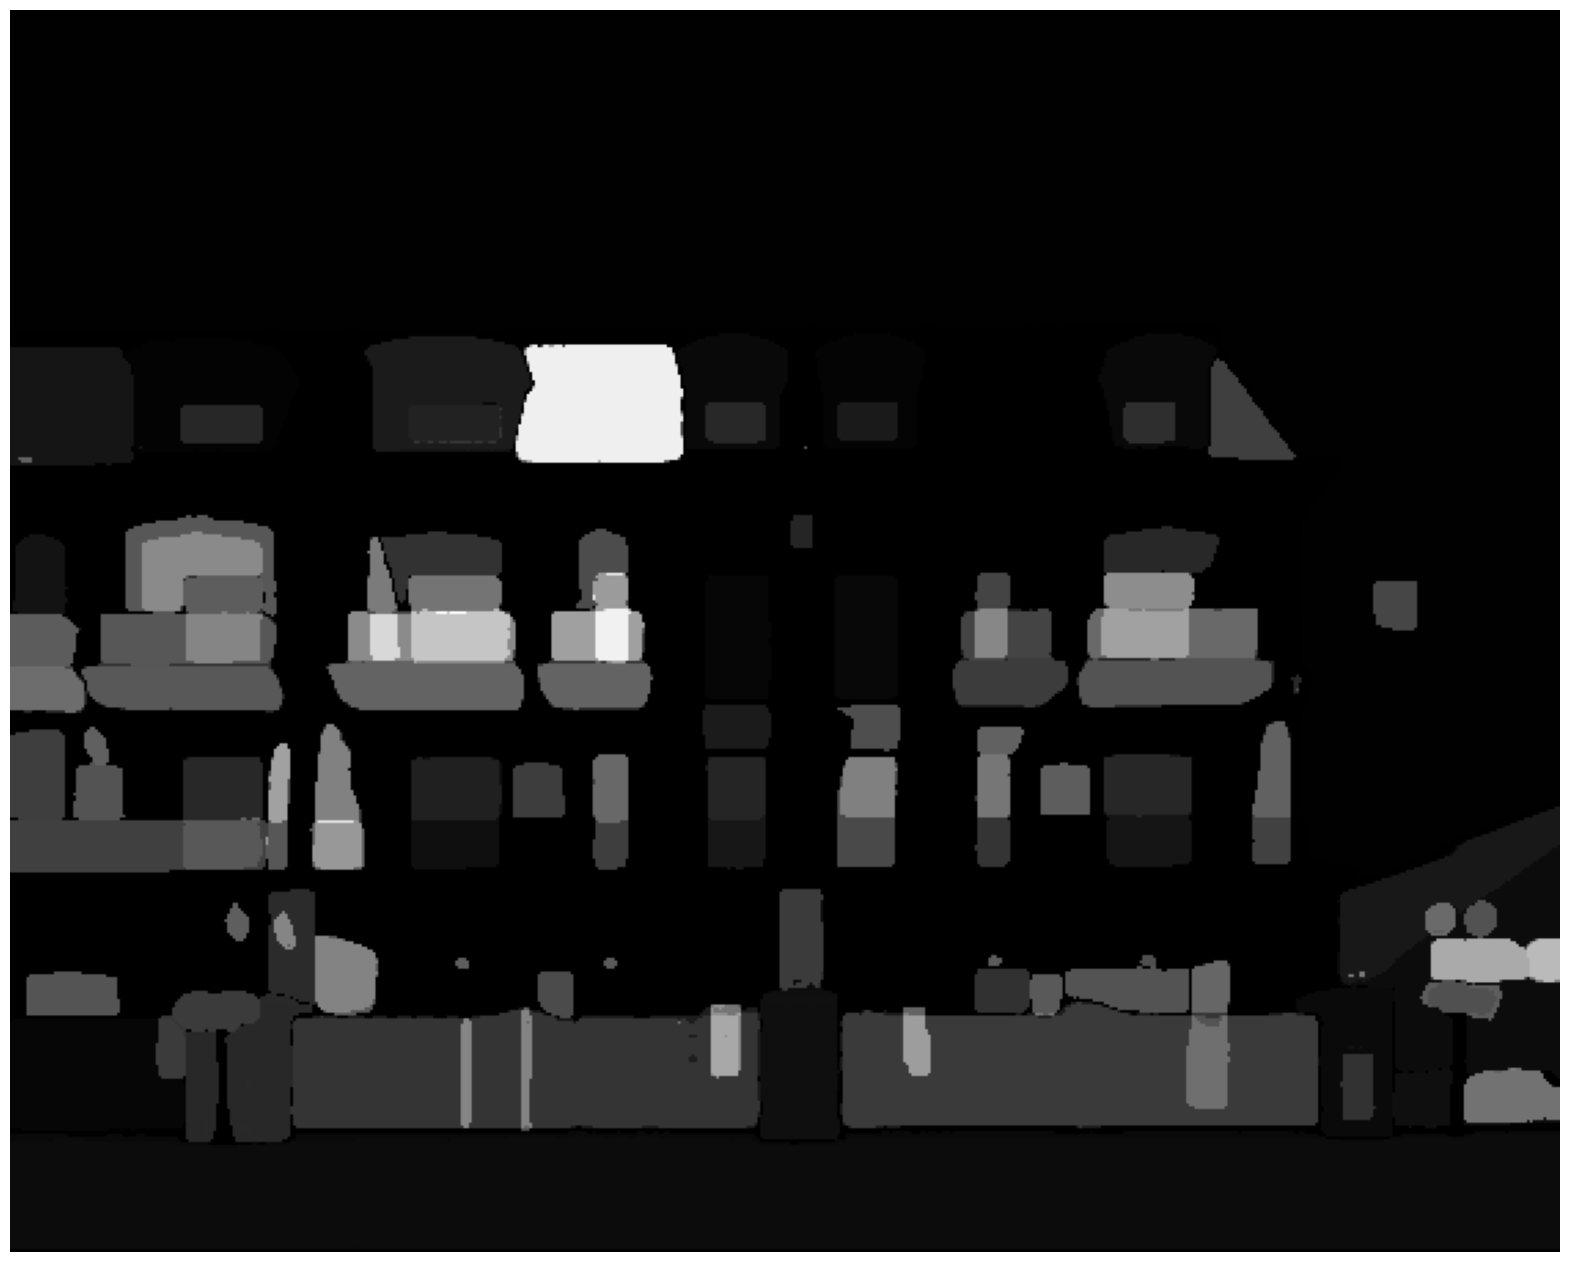

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Define a grayscale mask visualization function
def show_grayscale_masks(image, masks):
    # Create an empty canvas for grayscale visualization
    canvas = np.zeros_like(image, dtype=np.float32)
    
    # Iterate over the masks and add them to the canvas
    for i, mask in enumerate(masks):
        mask_data = mask["segmentation"]
        canvas[mask_data > 0] += (i + 1)  # Assign a unique grayscale intensity to each mask

    # Normalize the canvas to scale intensities between 0 and 1
    canvas = canvas / canvas.max()

    # Display the grayscale image with masks overlaid
    plt.figure(figsize=(20, 20))
    plt.imshow(canvas, cmap="gray")  # Display in grayscale
    plt.axis("off")
    plt.show()

# Example usage
show_grayscale_masks(image, masks)


In [29]:
# import os
# import cv2
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.utils import to_categorical
# from sklearn.model_selection import train_test_split

# # Paths
# image_dir = r"D:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Classic"
# mask_output_dir = r"D:\Real Estate\House_Style_Project\House_style_ML\mask"

# os.makedirs(mask_output_dir, exist_ok=True)

# # Parameters
# IMG_HEIGHT = 128
# IMG_WIDTH = 128

# # Function to generate masks
# def generate_masks(image_dir, mask_output_dir):
#     for filename in os.listdir(image_dir):
#         # Load the image
#         img_path = os.path.join(image_dir, filename)
#         img = cv2.imread(img_path)
#         if img is None:
#             continue
        
#         # Convert to grayscale
#         gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
#         # Apply thresholding to create a binary mask
#         _, mask = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

#         # Optionally resize mask to standard size
#         mask = cv2.resize(mask, (IMG_WIDTH, IMG_HEIGHT))

#         # Save the generated mask
#         mask_filename = os.path.join(mask_output_dir, f"{os.path.splitext(filename)[0]}_mask.png")
#         cv2.imwrite(mask_filename, mask)

# # Generate masks
# generate_masks(image_dir, mask_output_dir)


In [30]:
# import tensorflow as tf
# import cv2
# import numpy as np
# import os
# from tensorflow.keras.applications import mobilenet_v2

# # Load the pretrained DeepLabV3 model
# model = tf.keras.applications.DenseNet121(
#     weights="imagenet", include_top=False, input_shape=(224, 224, 3)
# )

# # Paths
# image_dir = r"D:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Classic"
# mask_output_dir = r"D:\Real Estate\House_Style_Project\House_style_ML\mask_predic"

# os.makedirs(mask_output_dir, exist_ok=True)

# # Generate masks
# for filename in os.listdir(image_dir):
#     img_path = os.path.join(image_dir, filename)
#     img = cv2.imread(img_path)
#     if img is None:
#         continue

#     # Preprocess image
#     img_resized = cv2.resize(img, (224, 224))
#     img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_resized)
#     img_array = np.expand_dims(img_array, axis=0)

#     # Predict mask
#     pred = model.predict(img_array)[0]
#     mask = np.argmax(pred, axis=-1)  # Get class with the highest probability

#     # Save mask
#     mask_resized = cv2.resize(mask.astype(np.uint8), (img.shape[1], img.shape[0]))
#     mask_filename = os.path.join(mask_output_dir, f"{os.path.splitext(filename)[0]}_mask.png")
#     cv2.imwrite(mask_filename, mask_resized * 255)  # Scale to 0-255 for visualization


In [31]:
# import os
# import cv2
# import numpy as np

# # Paths to the input images and output masks
# image_dir = r"D:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Classic"
# mask_output_dir = r"D:\Real Estate\House_Style_Project\House_style_ML\mask"

# # Create output directory if it doesn't exist
# os.makedirs(mask_output_dir, exist_ok=True)

# # Parameters for resizing images
# IMG_HEIGHT = 512  # Height of the resized mask
# IMG_WIDTH = 512   # Width of the resized mask

# def generate_masks(image_dir, mask_output_dir):
#     """
#     Generate binary masks for images in the specified directory and save them as PNG files.
#     """
#     for filename in os.listdir(image_dir):
#         img_path = os.path.join(image_dir, filename)
        
#         # Read the image
#         img = cv2.imread(img_path)
#         if img is None:
#             print(f"Skipping invalid image: {filename}")
#             continue

#         # Convert the image to grayscale
#         gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
#         # Apply thresholding to create a binary mask
#         _, mask = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

#         # Resize the mask to standard dimensions
#         mask_resized = cv2.resize(mask, (IMG_WIDTH, IMG_HEIGHT))

#         # Save the generated mask
#         mask_filename = os.path.splitext(filename)[0] + "_mask.png"
#         mask_path = os.path.join(mask_output_dir, mask_filename)
#         cv2.imwrite(mask_path, mask_resized)

#         print(f"Generated mask saved at: {mask_path}")

# # Run the mask generation process
# generate_masks(image_dir, mask_output_dir)

# print("Mask generation completed!")


In [32]:
# import os
# import cv2
# import numpy as np
# from matplotlib import pyplot as plt


# # Paths to the input images and output masks
# image_dir = r"D:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Classic"
# mask_output_dir = r"D:\Real Estate\House_Style_Project\House_style_ML\mask"

# # Create output directory if it doesn't exist
# os.makedirs(mask_output_dir, exist_ok=True)

# # Parameters for resizing images (optional)
# IMG_HEIGHT = 224  # Adjust as needed
# IMG_WIDTH = 224   # Adjust as needed

# def generate_gray_masks(image_dir, mask_output_dir):
#     """
#     Generate grayscale segmentation masks for images.
#     """
#     for filename in os.listdir(image_dir):
#         img_path = os.path.join(image_dir, filename)
        
#         # Read the image
#         img = cv2.imread(img_path)
#         if img is None:
#             print(f"Skipping invalid image: {filename}")
#             continue

#         # Convert the image to grayscale
#         gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
#         # Normalize to ensure pixel values represent segmentation classes
#         gray_normalized = cv2.normalize(gray, None, alpha=0, beta=13, norm_type=cv2.NORM_MINMAX)

#         # Optionally resize the mask to standard dimensions
#         gray_resized = cv2.resize(gray_normalized, (IMG_WIDTH, IMG_HEIGHT))

#         # Save the generated mask
#         mask_filename = os.path.splitext(filename)[0] + "_gray_mask.png"
#         mask_path = os.path.join(mask_output_dir, mask_filename)
#         cv2.imwrite(mask_path, gray_resized)
        
        

#         print(f"Generated grayscale mask saved at: {mask_path}")

# # Run the mask generation process
# generate_gray_masks(image_dir, mask_output_dir)

# print("Grayscale mask generation completed!")

# # Load the uploaded image
# image_path = r"D:\Real Estate\House_Style_Project\House_style_ML\mask\29d78067aa6d101b8acbc02177a99b36_gray_mask.png"
# image = cv2.imread(image_path)

# # Display the image
# plt.figure(figsize=(10, 5))
# plt.imshow(image, cmap='gray')
# plt.title("Uploaded Image in Grayscale")
# plt.axis("off")
# plt.show()


In [33]:
# import matplotlib.pyplot as plt
# # get matplot tab10 pallet RGB values
# tab10 = np.array(plt.cm.tab10.colors)
# # add [0,0,0] at 0th index for BG
# tab10 = np.concatenate((np.array([[0,0,0]]), tab10), axis=0)

# tab10 = tab10.reshape(1, 11, 3)
# # now pass this as custom pallet

In [34]:
# import cv2
# from gray2color import gray2color

# mask = cv2.imread(r'D:\Real Estate\House_Style_Project\House_style_ML\mask\0bfde992c25d5e7b22fbe30e4df3ef17_gray_mask.png', 0)
# rgb = gray2color(mask, use_pallet='cityscape', custom_pallet=None)
# ## Lambda Function

# from gray2color import gray2color
# g2c = lambda x : gray2color(x, use_pallet='cityscape',
#                             custom_pallet=np.asarray(config['pallet']).reshape(1,-1,3)/255)

In [35]:

# values are in order [R, G, B] ranging from [0, 255]

pallet_cityscape = np.array([[[128, 64, 128],
                            [244, 35, 232],
                            [70, 70, 70],
                            [102, 102, 156],
                            [190, 153, 153]]], np.uint8) / 255

In [36]:
# import cv2

# rgb = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)  #   becaues cv2 will change color channels before writing
# imm = cv2.imshow(r'D:\Real Estate\House_Style_Project\House_style_ML\mask\0bfde992c25d5e7b22fbe30e4df3ef17_gray2color_mask.png', rgb)
# # imm
# # cv2.imshow(cv2.imwrite(imm))

In [37]:
# import tensorflow as tf
# import cv2
# import numpy as np
# import os
# from tensorflow.keras.applications import mobilenet_v2

# # Load the pretrained DeepLabV3 model
# model = tf.keras.applications.DenseNet121(
#     weights="imagenet", include_top=False, input_shape=(1024, 1024, 3)
# )

# # Paths
# image_dir = r"D:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Classic"
# mask_output_dir = r"D:\Real Estate\House_Style_Project\House_style_ML\mask_predic"

# os.makedirs(mask_output_dir, exist_ok=True)

# # Generate masks
# for filename in os.listdir(image_dir):
#     img_path = os.path.join(image_dir, filename)
#     img = cv2.imread(img_path)
#     if img is None:
#         continue

#     # Preprocess image
#     img_resized = cv2.resize(img, (1024, 1024))
#     img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_resized)
#     img_array = np.expand_dims(img_array, axis=0)

#     # Predict mask
#     pred = model.predict(img_array)[0]
#     mask = np.argmax(pred, axis=-1)  # Get class with the highest probability

#     # Save mask
#     mask_resized = cv2.resize(mask.astype(np.uint8), (img.shape[1], img.shape[0]))
#     mask_filename = os.path.join(mask_output_dir, f"{os.path.splitext(filename)[0]}_mask.png")
#     cv2.imwrite(mask_filename, mask_resized * 255)  # Scale to 0-255 for visualization
